In [1]:
import requests
import json

In [2]:
api_url = 'http://content.guardianapis.com/#/search?q=Australia'

In [3]:
my_key = "1b51187d-aba0-4f00-8215-665a5ec769c6"

In [4]:
payload = {
        'api-key':              my_key,
        'page-size':            200,
        'show-editors-picks':   'true',
        'show-elements':        'image',
        'show-fields':          'all'

}

In [5]:
response = requests.get(api_url, params=payload)

In [6]:
data = response.json()

In [7]:
data

{'response': {'status': 'ok',
  'userTier': 'developer',
  'total': 1,
  'editorsPicks': []}}

In [8]:
response.json()

{'response': {'status': 'ok',
  'userTier': 'developer',
  'total': 1,
  'editorsPicks': []}}

In [9]:
url = 'https://content.guardianapis.com/search'
payload = {'order-by': 'oldest', 'q': 'UFO', 'api-key': my_key }

In [10]:
payload['page-size'] = 100
payload['page'] = 1

r = requests.get(url, payload)
j = json.loads(r.text)

In [11]:
r.text[:3000]

'{"response":{"status":"ok","userTier":"developer","total":1279,"startIndex":1,"pageSize":100,"currentPage":1,"pages":13,"orderBy":"oldest","results":[{"id":"uk/1989/jun/14/2","type":"article","sectionId":"uk-news","sectionName":"UK news","webPublicationDate":"1989-06-14T10:26:21Z","webTitle":"Guardian Tomorrows: Toxicity on tap","webUrl":"https://www.theguardian.com/uk/1989/jun/14/2","apiUrl":"https://content.guardianapis.com/uk/1989/jun/14/2","isHosted":false,"pillarId":"pillar/news","pillarName":"News"},{"id":"theguardian/1998/dec/31/features11.g2","type":"article","sectionId":"global","sectionName":"Global","webPublicationDate":"1998-12-31T04:21:18Z","webTitle":"They came from Kent","webUrl":"https://www.theguardian.com/theguardian/1998/dec/31/features11.g2","apiUrl":"https://content.guardianapis.com/theguardian/1998/dec/31/features11.g2","isHosted":false},{"id":"media/1999/jan/25/tvandradio.television1","type":"article","sectionId":"culture","sectionName":"Culture","webPublication

In [12]:
import pandas as pd

In [13]:
s = j['response']['results']

In [14]:
s[:3]

[{'id': 'uk/1989/jun/14/2',
  'type': 'article',
  'sectionId': 'uk-news',
  'sectionName': 'UK news',
  'webPublicationDate': '1989-06-14T10:26:21Z',
  'webTitle': 'Guardian Tomorrows: Toxicity on tap',
  'webUrl': 'https://www.theguardian.com/uk/1989/jun/14/2',
  'apiUrl': 'https://content.guardianapis.com/uk/1989/jun/14/2',
  'isHosted': False,
  'pillarId': 'pillar/news',
  'pillarName': 'News'},
 {'id': 'theguardian/1998/dec/31/features11.g2',
  'type': 'article',
  'sectionId': 'global',
  'sectionName': 'Global',
  'webPublicationDate': '1998-12-31T04:21:18Z',
  'webTitle': 'They came from Kent',
  'webUrl': 'https://www.theguardian.com/theguardian/1998/dec/31/features11.g2',
  'apiUrl': 'https://content.guardianapis.com/theguardian/1998/dec/31/features11.g2',
  'isHosted': False},
 {'id': 'media/1999/jan/25/tvandradio.television1',
  'type': 'article',
  'sectionId': 'culture',
  'sectionName': 'Culture',
  'webPublicationDate': '1999-01-25T04:17:17Z',
  'webTitle': 'Watching b

In [15]:
df = pd.DataFrame(s)

In [16]:
df['webPublicationDate'] = pd.to_datetime(df['webPublicationDate'])

In [17]:
df.sort_values(by = ['webPublicationDate'], ascending=False)

,id,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,apiUrl,isHosted,pillarId,pillarName
99,travel/2001/nov/25/familyholidays.family.nethe...,article,travel,Travel,2001-11-25 17:56:46+00:00,Cheesy... but charming,https://www.theguardian.com/travel/2001/nov/25...,https://content.guardianapis.com/travel/2001/n...,False,pillar/lifestyle,Lifestyle
98,culture/2001/nov/13/artsfeatures.syd,article,global,Global,2001-11-13 15:52:30+00:00,"If you see Syd, tell him",https://www.theguardian.com/culture/2001/nov/1...,https://content.guardianapis.com/culture/2001/...,False,NaN,NaN
97,uk/2001/nov/04/redbox,article,uk-news,UK news,2001-11-04 12:18:49+00:00,Spies admit it: there are no aliens out there,https://www.theguardian.com/uk/2001/nov/04/redbox,https://content.guardianapis.com/uk/2001/nov/0...,False,pillar/news,News
96,uk/2001/oct/21/humanities.research,article,uk-news,UK news,2001-10-21 10:01:59+00:00,How Churchill chased flying saucers,https://www.theguardian.com/uk/2001/oct/21/hum...,https://content.guardianapis.com/uk/2001/oct/2...,False,pillar/news,News
95,culture/2001/oct/06/artsfeatures1,article,global,Global,2001-10-05 23:00:00+00:00,Pop review: The Cooper Temple Clause,https://www.theguardian.com/culture/2001/oct/0...,https://content.guardianapis.com/culture/2001/...,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4,uk/1999/mar/20/4,article,uk-news,UK news,1999-03-20 04:06:49+00:00,Pity the poor aliens,https://www.theguardian.com/uk/1999/mar/20/4,https://content.guardianapis.com/uk/1999/mar/20/4,False,pillar/news,News
3,society/1999/mar/17/guardiansocietysupplement,article,society,Society,1999-03-17 02:26:08+00:00,Cover stories,https://www.theguardian.com/society/1999/mar/1...,https://content.guardianapis.com/society/1999/...,False,pillar/news,News
2,media/1999/jan/25/tvandradio.television1,article,culture,Culture,1999-01-25 04:17:17+00:00,Watching brief,https://www.theguardian.com/media/1999/jan/25/...,https://content.guardianapis.com/media/1999/ja...,False,pillar/arts,Arts
1,theguardian/1998/dec/31/features11.g2,article,global,Global,1998-12-31 04:21:18+00:00,They came from Kent,https://www.theguardian.com/theguardian/1998/d...,https://content.guardianapis.com/theguardian/1...,False,NaN,NaN


<AxesSubplot:>

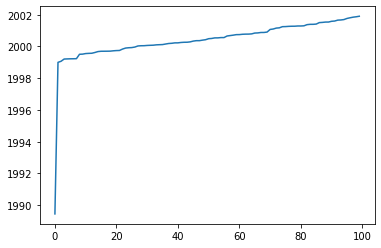

In [18]:
df2 = df['webPublicationDate']
df2.plot()

https://pythonspot.com/sqlite-database-with-pandas/

In [19]:
!rm ufo.db

In [20]:
import sqlite3
conn = sqlite3.connect('ufo.db')

In [21]:
df.to_sql('ufo.db',con = conn)

In [22]:
conn.close()